In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

import sdss_gz_data as sgd

In [4]:
features = [
    'deVAB_i',
    'expAB_g',
    'expAB_i',
    'expAB_z',
    'expRad_g',
    'expRad_u',
    'expRad_z',
    'fiberMag_g',
    'fiberMag_u',
    'fiberMag_z',
    'model_g_u_colour_index',
    'model_i_r_colour_index',
    'model_r_g_colour_index',
    'model_z_i_colour_index',
    'dered_r',
    'petroRad_r',
    'petro_R90_R50_ratio_g',
    'petro_R90_R50_ratio_i',
    'petro_r_g_colour_index',
    'psfMag_r'    
]

In [5]:
non_gz_data = sgd.prepare_data(sgd.load_data('data/non_gz_galaxies_dr8.csv.gz'), init_galaxy_type=False)
non_gz_data = sgd.transform_data(non_gz_data)

Number of high z galaxies = 0
Filtered out 0 invalid records


In [6]:
len(non_gz_data)

7143

In [7]:
non_gz_data = non_gz_data[non_gz_data.z >= 0.01]

In [8]:
len(non_gz_data)

6545

In [222]:
#non_gz_data.to_csv('dr15_non_gz_galaxies.csv.gz')

In [9]:
X_non_gz = non_gz_data[features]
y_non_gz = non_gz_data['z']

In [10]:
y_non_gz.values

array([0.1350541, 0.3500838, 0.1390745, ..., 0.2784165, 0.1362483,
       0.3925192])

In [11]:
transformed_data = pd.read_csv('debiased_prepared_data.csv.bz2',index_col=0)
transformed_data.objid = transformed_data.objid.astype(str)

In [70]:
X_train_ns = pd.read_csv('train_data_new_split.csv.bz2',index_col=0)
y_train_ns = pd.read_csv('train_y_new_split.csv.bz2',index_col=0)

X_test_ns = pd.read_csv('test_data_new_split.csv.bz2',index_col=0)
y_test_ns = pd.read_csv('test_y_new_split.csv.bz2',index_col=0)

In [69]:
with open('x_scaler_new_split.pkl', 'rb') as f:
    import pickle
    
    x_scaler_ns = pickle.load(f)

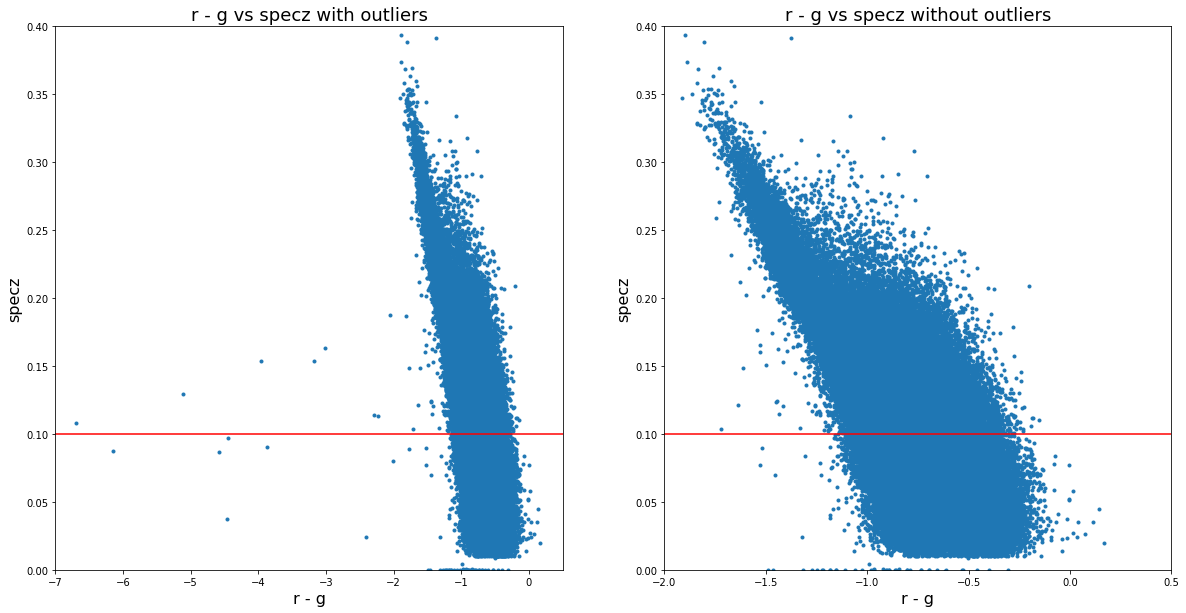

In [27]:
# #bins = np.linspace(np.min(X_test['model_r_g_colour_index']) - 1e-5, np.max(X_test['model_r_g_colour_index']) + 1e-5 , 100)
# fig, ax = plt.subplots(figsize=(15,15))

# lin = np.linspace(np.min(y_results['z']), np.max(y_results['z']), 100)

# ax.scatter(y_results['z'], y_results['photoz'], marker='.')
# _ = ax.plot(lin, lin, c= "red")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1 = plt.subplot(1, 2, 1)
x_lin = np.linspace(-7, 1, 100)
y_lin = np.full_like(x_lin, 0.1)
ax1.scatter(transformed_data['model_r_g_colour_index'], transformed_data['z'], marker='.') #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)
ax1.plot(x_lin, y_lin, c="red")
ax1.axis([-7, 0.5, 0, 0.4])
ax1.set_title('r - g vs specz with outliers', fontsize=18)
ax1.set_xlabel('r - g', fontsize=16)
ax1.set_ylabel('specz', fontsize=16)

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(transformed_data[selector]['model_r_g_colour_index'], transformed_data[selector]['z'], marker='.') #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)
ax2.axis([-2, 0.5, 0, 0.4])
ax2.plot(x_lin, y_lin, c="red")
ax2.set_title('r - g vs specz without outliers', fontsize=18)
ax2.set_xlabel('r - g', fontsize=16)
ax2.set_ylabel('specz', fontsize=16)

plt.show()

In [15]:
selector = np.all([
    transformed_data['z'] > 0.01,
    transformed_data['z'] < 0.2,
    transformed_data['model_r_g_colour_index'] < -1.75
], axis=0)


transformed_data[selector].index #.sort_values('model_r_g_colour_index')

Int64Index([  2638,   6939,   9368,  14548,  24666,  27858,  33204,  33818,
             38246,  42787,  48985,  52613,  63028,  67023, 116604, 122214,
            181669, 191718],
           dtype='int64')

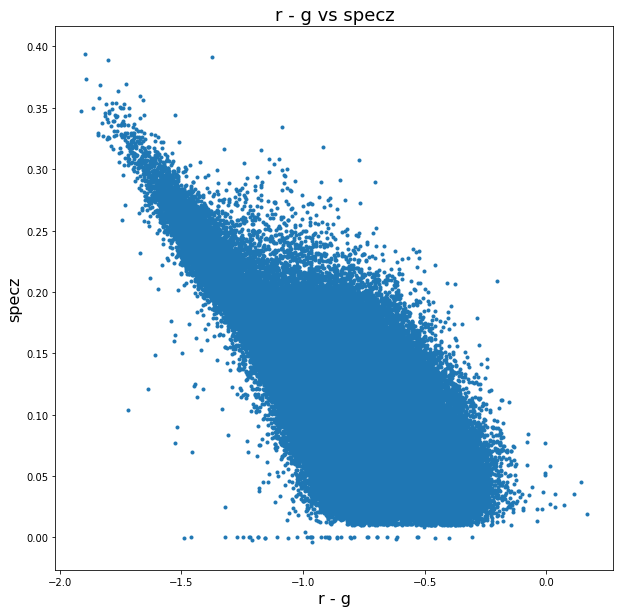

In [21]:
selector = np.all([
    transformed_data['z'] > 0.01,
    transformed_data['z'] < 0.2,
    transformed_data['model_r_g_colour_index'] < -1.75
], axis=0)

selector = np.invert(selector)

fig, ax = plt.subplots(figsize=(10,10))
#x_lin = np.linspace(-7, 1, 100)
#y_lin = np.full_like(x_lin, 0.1)
ax.scatter(transformed_data[selector]['model_r_g_colour_index'], transformed_data[selector]['z'], marker='.') #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)
#ax.plot(x_lin, y_lin, c="red")
#ax.axis([-7, 1, 0, 0.4])
ax.set_title('r - g vs specz', fontsize=18)
ax.set_xlabel('r - g', fontsize=16)
ax.set_ylabel('specz', fontsize=16)
plt.show()

In [41]:
transformed_data[selector].sort_values('model_r_g_colour_index')

,objid,run,rerun,camcol,field,obj,ra,dec,clean,petroRad_u,...,avg_stokes_u,avg_stokes_q,petro_g_u_colour_index,petro_r_g_colour_index,petro_i_r_colour_index,petro_z_i_colour_index,psfMag_g_u_colour_index,psfMag_r_g_colour_index,psfMag_i_r_colour_index,psfMag_z_i_colour_index
48985,1237655504569696406,2335,301,6,47,150,254.300137,39.304023,1,2.969874,...,0.690404,-0.159264,-1.92831,-4.28373,-1.03519,0.09522,0.47932,-5.87914,-0.73705,-0.28507
14548,1237650795681153153,1239,301,3,142,129,141.672520,-0.357491,1,1.387974,...,-0.209860,-0.036564,3.17329,-6.07076,-0.43278,-0.43630,3.23393,-5.68147,-0.47350,-0.49310
52613,1237655472893788239,2328,301,3,39,79,246.879398,41.498807,1,1.130079,...,0.026502,-0.060281,-0.29319,-4.42938,-0.49522,-0.32627,-0.72403,-2.44073,-0.37287,-0.38123
67023,1237658493360144414,3031,301,5,506,30,196.334852,10.282182,1,2.969942,...,0.081141,0.224277,2.15782,-5.22439,-0.49457,-0.13060,-0.04686,-2.86165,-0.66525,-0.46989
191718,1237667781778014228,5194,301,2,723,20,225.817095,16.584843,1,0.742243,...,-0.325763,-0.074057,-0.49936,-4.00743,-0.52477,-0.05449,-2.42466,-1.72542,-0.50588,-0.73102
116604,1237663917880901725,4294,301,5,156,93,128.259115,61.108959,1,0.613766,...,-0.096695,0.177181,-1.23921,-5.42608,-0.50590,-0.24299,-1.81805,-2.32519,-0.60417,-0.42457
122214,1237665127471513640,4576,301,2,468,40,188.667587,34.295742,1,3.221953,...,-0.126289,-0.091131,0.77954,-4.43772,0.24092,0.15679,-0.79238,-2.50565,-0.27184,-0.37234
38246,1237654605854998587,2126,301,4,157,59,142.633907,4.044219,1,5.855271,...,0.285344,0.205257,4.91514,-6.80707,-0.38816,-0.41745,0.32844,-2.08643,-0.33620,-0.35130
33818,1237656242234393135,2507,301,4,109,559,333.208059,13.027302,1,0.699120,...,-0.227752,0.013278,1.16146,-3.83819,-1.10575,-0.13187,-1.47220,-2.37462,-0.94197,-0.25309
63028,1237657775010677270,2864,301,3,259,534,147.270514,45.670418,1,3.455296,...,-0.005886,-0.102624,-0.35410,-2.66690,-0.43370,-0.26752,-0.19496,-2.89964,-0.49842,-0.46627


In [86]:
train_data = X_train.copy()
train_data['z'] = y_train['z']
train_data['galaxy_type'] = y_train['galaxy_type']

In [87]:
corr = train_data.corr()
# plt.figure(figsize=(15,15))
# plt.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
# plt.show()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,deVAB_i,expAB_g,expAB_i,expAB_z,expRad_g,expRad_u,expRad_z,fiberMag_g,fiberMag_u,fiberMag_z,model_g_u_colour_index,model_i_r_colour_index,model_r_g_colour_index,model_z_i_colour_index,dered_r,petroRad_r,petro_R90_R50_ratio_g,petro_R90_R50_ratio_i,petro_r_g_colour_index,psfMag_r,z,galaxy_type
deVAB_i,1,0.98,0.99,0.97,-0.33,-0.24,-0.34,-0.19,-0.12,-0.21,-0.09,0.073,-0.17,0.097,-0.23,0.093,0.11,0.098,-0.19,-0.25,0.26,0.52
expAB_g,0.98,1,0.99,0.97,-0.37,-0.27,-0.36,-0.15,-0.092,-0.19,-0.098,0.066,-0.18,0.094,-0.18,0.045,0.1,0.085,-0.2,-0.23,0.28,0.52
expAB_i,0.99,0.99,1,0.98,-0.37,-0.27,-0.37,-0.15,-0.085,-0.18,-0.098,0.06,-0.18,0.093,-0.17,0.039,0.11,0.097,-0.2,-0.23,0.29,0.52
expAB_z,0.97,0.97,0.98,1,-0.39,-0.28,-0.4,-0.16,-0.088,-0.2,-0.11,0.046,-0.2,0.074,-0.18,0.032,0.14,0.13,-0.21,-0.24,0.29,0.53
expRad_g,-0.33,-0.37,-0.37,-0.39,1,0.75,0.95,-0.093,-0.24,0.095,0.4,0.4,0.55,0.32,-0.46,0.79,-0.5,-0.49,0.59,0.16,-0.55,-0.48
expRad_u,-0.24,-0.27,-0.27,-0.28,0.75,1,0.7,0.16,0.1,0.21,0.18,0.16,0.23,0.15,-0.23,0.62,-0.4,-0.36,0.28,0.27,-0.21,-0.33
expRad_z,-0.34,-0.36,-0.37,-0.4,0.95,0.7,1,-0.07,-0.24,0.15,0.43,0.46,0.58,0.38,-0.42,0.73,-0.51,-0.55,0.59,0.21,-0.56,-0.45
fiberMag_g,-0.19,-0.15,-0.15,-0.16,-0.093,0.16,-0.07,1,0.9,0.88,0.011,-0.22,-0.23,-0.037,0.84,-0.26,-0.35,-0.3,-0.2,0.88,0.59,-0.2
fiberMag_u,-0.12,-0.092,-0.085,-0.088,-0.24,0.1,-0.24,0.9,1,0.62,-0.4,-0.48,-0.55,-0.34,0.72,-0.29,-0.069,-0.0092,-0.52,0.64,0.68,0.036
fiberMag_z,-0.21,-0.19,-0.18,-0.2,0.095,0.21,0.15,0.88,0.62,1,0.38,0.21,0.23,0.37,0.78,-0.17,-0.58,-0.57,0.24,0.96,0.28,-0.41


In [88]:
test_data = X_test.copy()
test_data['z'] = y_test['z']
test_data['galaxy_type'] = y_test['galaxy_type']

In [89]:
corr = test_data.corr()
# plt.figure(figsize=(15,15))
# plt.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
# plt.show()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,deVAB_i,expAB_g,expAB_i,expAB_z,expRad_g,expRad_u,expRad_z,fiberMag_g,fiberMag_u,fiberMag_z,model_g_u_colour_index,model_i_r_colour_index,model_r_g_colour_index,model_z_i_colour_index,dered_r,petroRad_r,petro_R90_R50_ratio_g,petro_R90_R50_ratio_i,petro_r_g_colour_index,psfMag_r,z,galaxy_type
deVAB_i,1,0.98,0.99,0.97,-0.34,-0.25,-0.34,-0.18,-0.12,-0.21,-0.097,0.077,-0.17,0.097,-0.22,0.093,0.11,0.1,-0.19,-0.25,0.27,0.53
expAB_g,0.98,1,0.99,0.97,-0.38,-0.27,-0.36,-0.15,-0.086,-0.18,-0.1,0.071,-0.18,0.094,-0.18,0.044,0.11,0.087,-0.2,-0.23,0.29,0.52
expAB_i,0.99,0.99,1,0.98,-0.38,-0.27,-0.38,-0.14,-0.078,-0.18,-0.1,0.066,-0.19,0.094,-0.17,0.039,0.11,0.099,-0.2,-0.22,0.3,0.52
expAB_z,0.97,0.97,0.98,1,-0.39,-0.28,-0.4,-0.16,-0.082,-0.2,-0.12,0.05,-0.2,0.073,-0.17,0.032,0.14,0.13,-0.22,-0.24,0.3,0.53
expRad_g,-0.34,-0.38,-0.38,-0.39,1,0.75,0.95,-0.097,-0.25,0.09,0.4,0.4,0.55,0.32,-0.46,0.79,-0.5,-0.5,0.59,0.16,-0.55,-0.48
expRad_u,-0.25,-0.27,-0.27,-0.28,0.75,1,0.7,0.16,0.099,0.2,0.18,0.16,0.23,0.15,-0.23,0.62,-0.41,-0.36,0.29,0.27,-0.21,-0.34
expRad_z,-0.34,-0.36,-0.38,-0.4,0.95,0.7,1,-0.075,-0.25,0.14,0.43,0.46,0.58,0.38,-0.42,0.73,-0.51,-0.55,0.59,0.2,-0.56,-0.45
fiberMag_g,-0.18,-0.15,-0.14,-0.16,-0.097,0.16,-0.075,1,0.9,0.88,0.014,-0.22,-0.23,-0.03,0.84,-0.26,-0.35,-0.31,-0.2,0.88,0.59,-0.2
fiberMag_u,-0.12,-0.086,-0.078,-0.082,-0.25,0.099,-0.25,0.9,1,0.62,-0.4,-0.49,-0.56,-0.34,0.72,-0.29,-0.069,-0.0097,-0.52,0.64,0.68,0.04
fiberMag_z,-0.21,-0.18,-0.18,-0.2,0.09,0.2,0.14,0.88,0.62,1,0.38,0.21,0.23,0.38,0.78,-0.17,-0.58,-0.57,0.24,0.96,0.28,-0.41


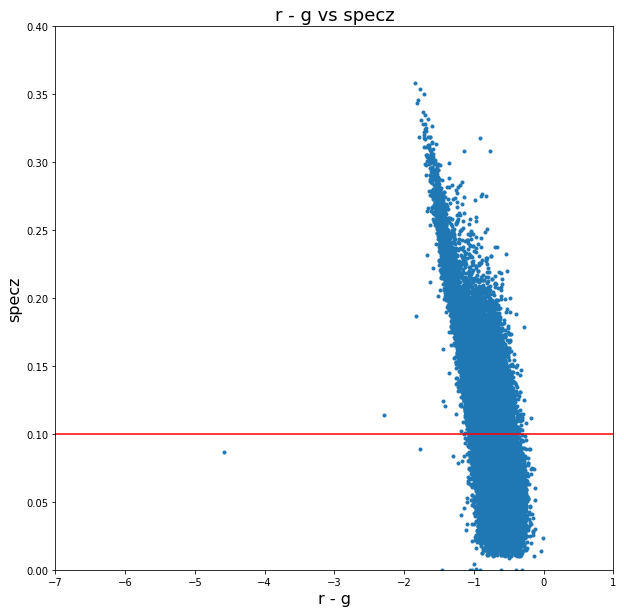

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_test['model_r_g_colour_index'], y_test['z'], marker='.') #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)
ax.plot(x_lin, y_lin, c="red")
ax.axis([-7, 1, 0, 0.4])
ax.set_title('r - g vs specz', fontsize=18)
ax.set_xlabel('r - g', fontsize=16)
ax.set_ylabel('specz', fontsize=16)
plt.show()

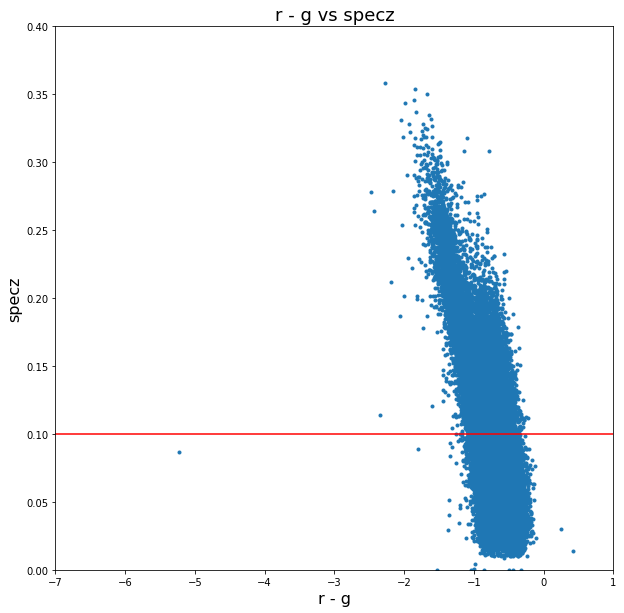

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_test['petro_r_g_colour_index'], y_test['z'], marker='.') #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)
ax.plot(x_lin, y_lin, c="red")
ax.axis([-7, 1, 0, 0.4])
ax.set_title('r - g vs specz', fontsize=18)
ax.set_xlabel('r - g', fontsize=16)
ax.set_ylabel('specz', fontsize=16)
plt.show()

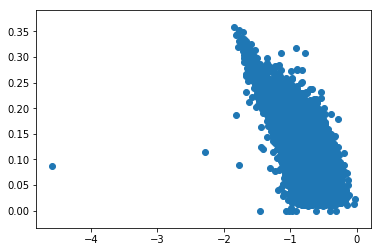

In [42]:
plt.scatter(X_test['model_r_g_colour_index'], y_test['z']) #hist(X_test['model_r_g_colour_index'], y_test['z'], bin)

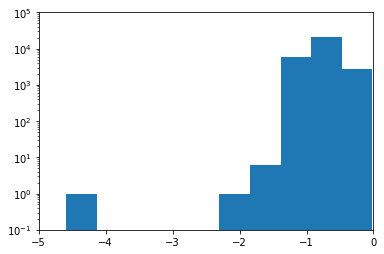

In [49]:
X_test_spiral = X_test[y_test.galaxy_type == 0]

plt.hist(X_test_spiral['model_r_g_colour_index'], log=True)
plt.axis([-5, 0, 0.1, 100000])
plt.show()

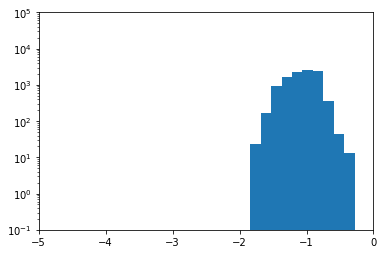

In [50]:
X_test_elliptical = X_test[y_test.galaxy_type == 1]

plt.hist(X_test_elliptical['model_r_g_colour_index'], log=True)
plt.axis([-5, 0, 0.1, 100000])
plt.show()

In [33]:
X_train = pd.read_csv('train_data.csv.bz2',index_col=0)
y_train = pd.read_csv('train_y.csv.bz2',index_col=0)

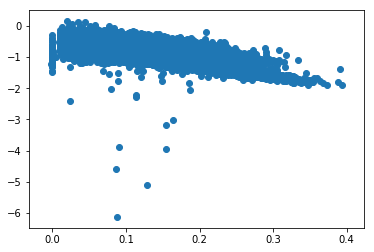

In [33]:
plt.scatter(y_train['z'], X_train['model_r_g_colour_index'])

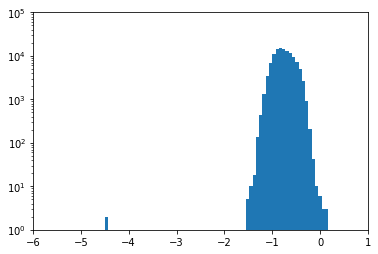

In [56]:
X_train_spiral = X_train[y_train.galaxy_type == 0]

plt.hist(X_train_spiral['model_r_g_colour_index'], bins=100, log=True)
plt.axis([-6, 1, 1, 100000])
plt.show()

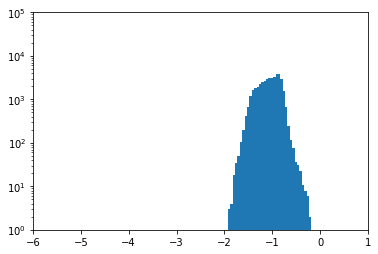

In [57]:
X_train_elliptical = X_train[y_train.galaxy_type == 1]

plt.hist(X_train_elliptical['model_r_g_colour_index'], bins=100, log=True)
plt.axis([-6, 1, 1, 100000])
plt.show()

In [58]:
X_test_scale = x_scaler.transform(X_test)

In [30]:
from sdss_gz_data import redshift_err
from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({"redshift_err": redshift_err})


Using TensorFlow backend.


In [31]:
with open('ann_2_layers_512_units.h5', 'rb') as f:
    ann2_models = pickle.load(f)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [62]:
with open('ann_5_layers_256_units.h5', 'rb') as f:
    ann5_models = pickle.load(f)

In [63]:
with open('ann_2_layers_512_units_new_split.h5', 'rb') as f:
    ann_2_layers_512_units_new_split = pickle.load(f)

In [64]:
with open('ann_2_layers_512_units_new_split_lower_lr.h5', 'rb') as f:
    ann_2_layers_512_units_new_split_lower_lr = pickle.load(f)

In [32]:
models = ann5_models
#models = ann_2_layers_512_units_new_split
#models = ann_2_layers_512_units_new_split_lower_lr

NameError: name 'ann5_models' is not defined

In [39]:
def init_predictions(models, X):
    return np.zeros((len(models), len(X), 2))

def scale_x(X):
    return x_scaler.transform(X)

In [237]:
predictions = init_predictions(models, X_non_gz) #np.zeros((len(models), len(y_))
X_test_scale = scale_x(X_non_gz)
for idx, model in enumerate(models):
    prediction = np.array(model.predict(X_test_scale))
    # move indexes around
    prediction = np.transpose(prediction)[0]
    predictions[idx] = prediction

In [238]:
predictions_avg = np.mean(predictions, axis=0)
predictions_err = np.max(np.abs(predictions - predictions_avg), axis=0)
predictions_std = np.std(predictions, axis=0)

In [239]:
galaxy_classification_preds = predictions.transpose()[0]
galaxy_classifications = np.count_nonzero(np.round(galaxy_classification_preds, 0), axis=1)

y_results = y_non_gz.copy().reset_index()
y_results['galaxy_type_pred_raw'] = predictions_avg[:,0]
y_results['galaxy_type_pred_err'] = predictions_err[:,0]
y_results['galaxy_type_pred_std'] = predictions_std[:,0]
y_results['galaxy_type_pred'] = np.round(y_results.galaxy_type_pred_raw,0)
y_results['galaxy_type_pred'] = y_results['galaxy_type_pred'].astype(int, copy=False)
y_results['elliptical_votes'] = galaxy_classifications
y_results['galaxy_type_pred_votes'] = 0
y_results.loc[y_results.elliptical_votes >= 3, 'galaxy_type_pred_votes'] = 1
#y_results['correct_votes'] = galaxy_classifications
#y_results.loc[y_results.galaxy_type == 0,'correct_votes'] = 5 - y_results['correct_votes']
#y_results['incorrect_votes'] = 5 - y_results['correct_votes']
y_results['photoz'] = predictions_avg[:,1]
y_results['photoz_err'] = (y_results['z'] - y_results['photoz'])/(1 + y_results['z'])
y_results['photoz_err_abs'] = np.abs(y_results['photoz_err'])
y_results['photoz_std'] = predictions_std[:,1]

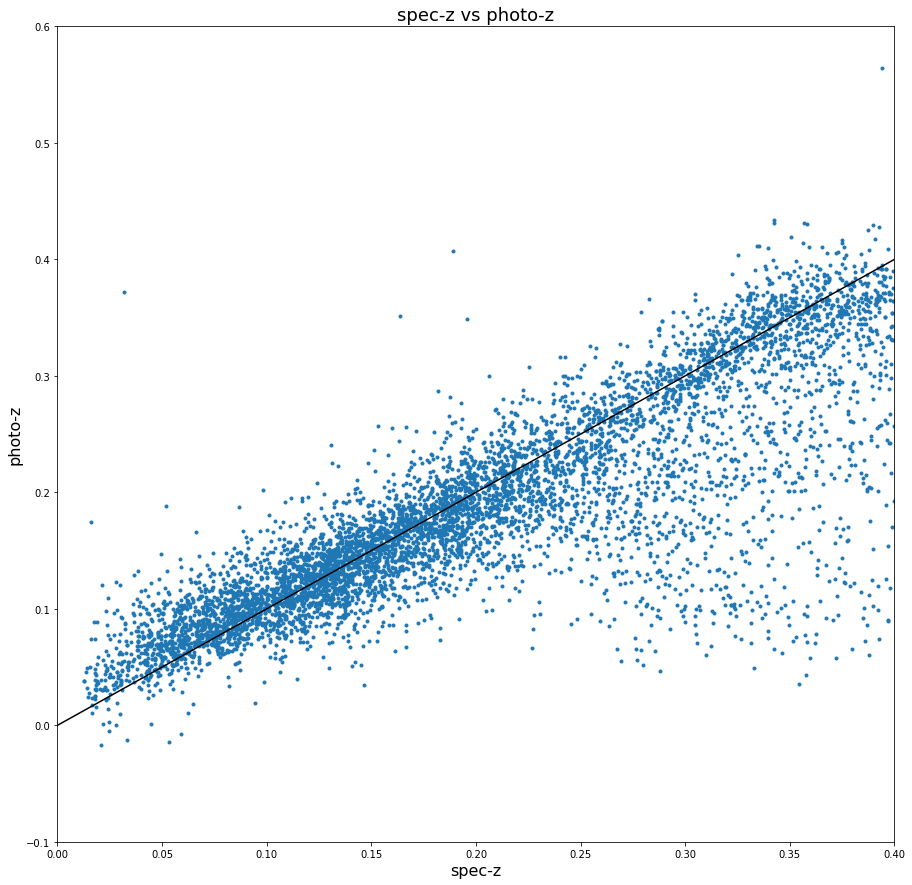

In [240]:
fig, ax = plt.subplots(figsize=(15,15))

lin = np.linspace(0, 0.4, 100)

ax.scatter(
    y_non_gz.values,
    y_results['photoz'],
    marker='.'
)
ax.plot(lin, lin, c='black')
ax.axis([0, 0.4, -0.1, 0.6])
ax.set_title('spec-z vs photo-z', fontsize=18)
ax.set_xlabel('spec-z', fontsize=16)
ax.set_ylabel('photo-z', fontsize=16)

plt.show()

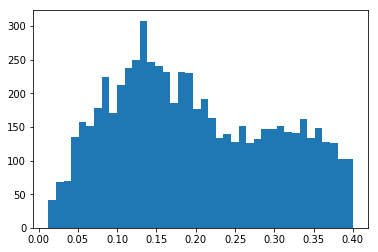

In [211]:
plt.hist(non_gz_data['z'], bins=40)
plt.show()

In [147]:
len(non_gz_data[non_gz_data.z < 0.001])

894

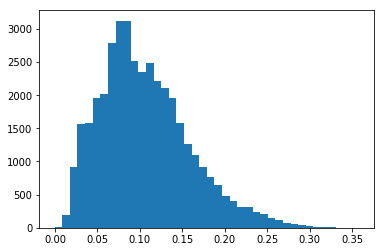

In [135]:
plt.hist(y_test['z'], bins=40)
plt.show()

In [142]:
non_gz_data[non_gz_data.zErr == 0][['objid','z', 'zErr']]

,objid,z,zErr
13,1237656494042907273,0.0,0.0
177,1237657609112649824,0.0,0.0
351,1237661357543588899,0.0,0.0
580,1237655374647526347,0.0,0.0
609,1237661387605148254,0.0,0.0
633,1237656241168777988,0.0,0.0
713,1237661850927759888,0.0,0.0
790,1237660241386013188,0.0,0.0
812,1237655108373906056,0.0,0.0
815,1237655129309643206,0.0,0.0


In [201]:
accum = 0
for i in range(101):
    min_range = 0.01 * i
    max_range = 0.01 * (i + 1)
    if (i == 100):
        max_range = 100.0

    selector = np.all([
        y_results.photoz_err_abs >= min_range,
        y_results.photoz_err_abs < max_range
    ], axis=0)
    num_of_records = len(y_results[selector])
    percentage = 100 * num_of_records / len(y_results)
    accum += percentage
    print(f'Z err between {min_range:0.2f} and {max_range:0.2f}: number = {num_of_records}, percentage = {percentage:0.2f}%, accum = {accum:0.2f}%')

Z err between 0.00 and 0.01: number = 2140, percentage = 29.96%, accum = 29.96%
Z err between 0.01 and 0.02: number = 1567, percentage = 21.94%, accum = 51.90%
Z err between 0.02 and 0.03: number = 946, percentage = 13.24%, accum = 65.14%
Z err between 0.03 and 0.04: number = 596, percentage = 8.34%, accum = 73.48%
Z err between 0.04 and 0.05: number = 388, percentage = 5.43%, accum = 78.92%
Z err between 0.05 and 0.06: number = 267, percentage = 3.74%, accum = 82.65%
Z err between 0.06 and 0.07: number = 206, percentage = 2.88%, accum = 85.54%
Z err between 0.07 and 0.08: number = 160, percentage = 2.24%, accum = 87.78%
Z err between 0.08 and 0.09: number = 134, percentage = 1.88%, accum = 89.65%
Z err between 0.09 and 0.10: number = 109, percentage = 1.53%, accum = 91.18%
Z err between 0.10 and 0.11: number = 90, percentage = 1.26%, accum = 92.44%
Z err between 0.11 and 0.12: number = 73, percentage = 1.02%, accum = 93.46%
Z err between 0.12 and 0.13: number = 69, percentage = 0.97%,

In [195]:
np.max(y_results.photoz_err_abs)

0.8301616080982586

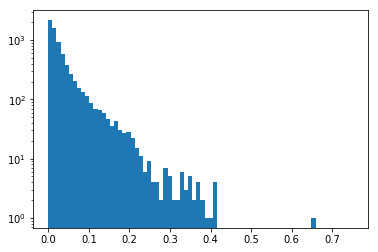

In [196]:
bins = np.linspace(0, 0.75, num=75)
_ = plt.hist(y_results.photoz_err_abs, bins=bins, log=True)

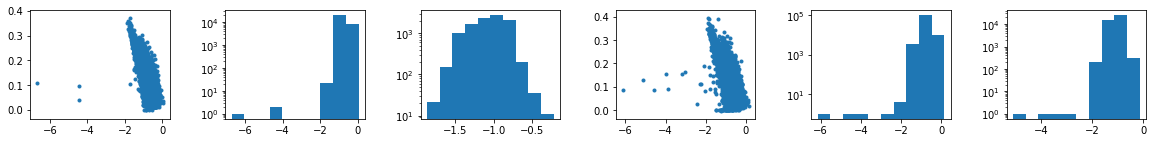

In [104]:
selected_features = [
    'deVAB_i',
    'expAB_g',
    'expAB_i',
    'expAB_z',
    'expRad_g',
    'expRad_u',
    'expRad_z',
    'fiberMag_g',
    'fiberMag_u',
    'fiberMag_z',
    'model_g_u_colour_index',
    'model_i_r_colour_index',
    'model_r_g_colour_index',
    'model_z_i_colour_index',
    'dered_r',
    'petroRad_r',
    'petro_R90_R50_ratio_g',
    'petro_R90_R50_ratio_i',
    'petro_r_g_colour_index',
    'psfMag_r'    
]

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

#for feature in selected_features:
fig = plt.figure(figsize=(20,2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x_test_feature = X_test['model_r_g_colour_index']
z_test = y_test['z']

test_spiral = y_test.galaxy_type == 0
test_elliptical = y_test.galaxy_type == 1
galaxy_test = y_test['galaxy_type']

x_train_feature = X_train['model_r_g_colour_index']
z_train = y_train['z']

train_spiral = y_train.galaxy_type == 0
train_elliptical = y_train.galaxy_type == 1
galaxy_train = y_train['galaxy_type']

ax = fig.add_subplot(1, 6, 1)
ax.scatter(x_test_feature, z_test, marker='.')
ax = fig.add_subplot(1, 6, 2)
ax.hist(x_test_feature[test_spiral], log=True)
ax = fig.add_subplot(1, 6, 3)
ax.hist(x_test_feature[test_elliptical], log=True)

ax = fig.add_subplot(1, 6, 4)
ax.scatter(x_train_feature, z_train, marker='.')
ax = fig.add_subplot(1, 6, 5)
ax.hist(x_train_feature[train_spiral], log=True)
ax = fig.add_subplot(1, 6, 6)
_ = ax.hist(x_train_feature[train_elliptical], log=True)


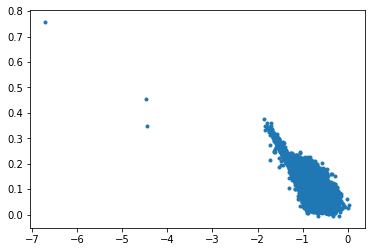

In [73]:
_ = plt.scatter(X_test['model_r_g_colour_index'], y_results['photoz'], marker='.')

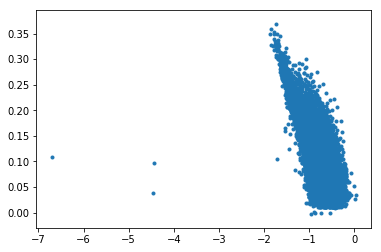

In [74]:
_ = plt.scatter(X_test['model_r_g_colour_index'], y_results['z'], marker='.')

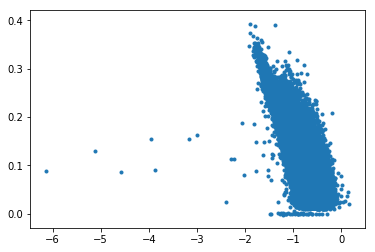

In [78]:
_ = plt.scatter(X_train['model_r_g_colour_index'], y_train['z'], marker='.')

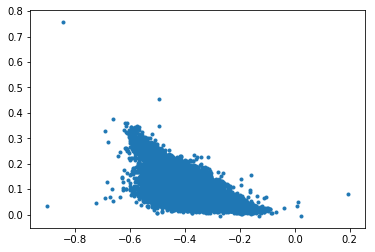

In [79]:
_ = plt.scatter(X_test['model_i_r_colour_index'], y_results['photoz'], marker='.')

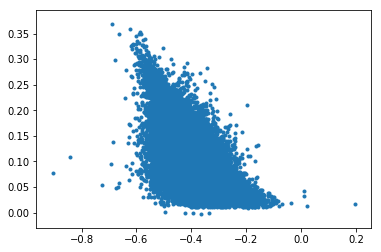

In [77]:
_ = plt.scatter(X_test['model_i_r_colour_index'], y_results['z'], marker='.')

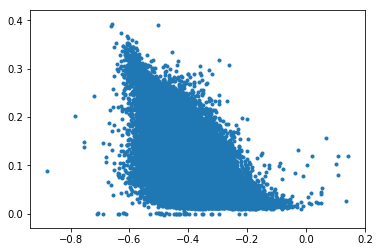

In [65]:
idx_sel = np.all([X_train['model_i_r_colour_index'] >= -1, X_train['model_i_r_colour_index'] <= 0.2], axis=0)

_ = plt.scatter(X_train[idx_sel]['model_i_r_colour_index'], y_train[idx_sel]['z'], marker='.')

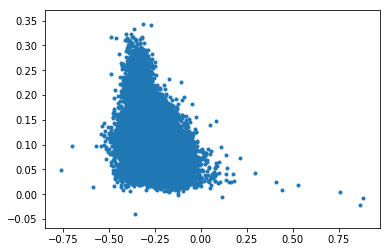

In [58]:
_ = plt.scatter(X_test['model_z_i_colour_index'], y_results['photoz'], marker='.')

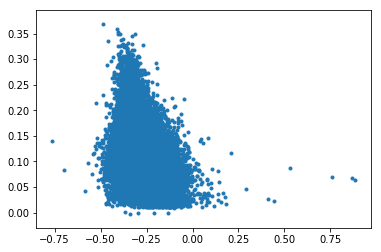

In [60]:
_ = plt.scatter(X_test['model_z_i_colour_index'], y_results['z'], marker='.')

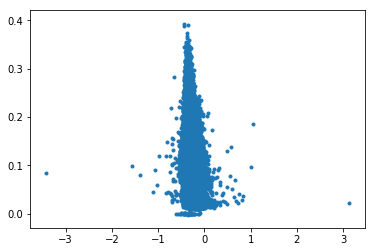

In [61]:
_ = plt.scatter(X_train['model_z_i_colour_index'], y_train['z'], marker='.')

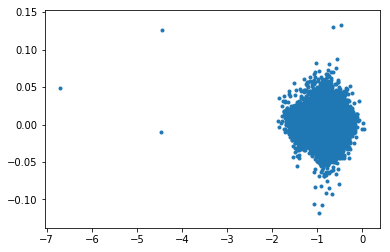

In [56]:
_ = plt.scatter(X_test['model_r_g_colour_index'], y_results['photoz_err'], marker='.')

In [71]:
invalid_galaxies = np.all([
    y_results.galaxy_type != y_results.galaxy_type_pred
], axis=0)

catastrophic_galaxies_err = np.any([
#    y_results.galaxy_type != y_results.galaxy_type_pred,
    y_results.galaxy_err > 0.8,
#     y_results.incorrect_votes >= 4
], axis=0)

y_results['galaxy_err'] = np.abs(y_results.galaxy_type - y_results.galaxy_type_pred_raw)

y_results[catastrophic_galaxies_err].sort_values('galaxy_err', ascending=False)

,index,galaxy_type,z,galaxy_type_pred_raw,galaxy_type_pred_err,galaxy_type_pred_std,galaxy_type_pred,elliptical_votes,galaxy_type_pred_votes,correct_votes,incorrect_votes,photoz,photoz_err,photoz_err_abs,photoz_std,galaxy_err
29621,113781,1,0.052153,0.000097,0.000160,0.000082,0,0,0,0,5,0.079195,-0.025702,0.025702,0.003648,0.999903
25910,196959,1,0.089201,0.001153,0.000623,0.000369,0,0,0,0,5,0.120489,-0.028726,0.028726,0.002179,0.998847
32198,53279,1,0.028300,0.001534,0.000238,0.000125,0,0,0,0,5,0.066122,-0.036781,0.036781,0.001811,0.998466
17893,161775,0,0.207895,0.997864,0.001342,0.000838,1,5,1,0,5,0.218321,-0.008632,0.008632,0.006533,0.997864
3641,167085,1,0.136056,0.002468,0.001067,0.000580,0,0,0,0,5,0.135749,0.000270,0.000270,0.003059,0.997532
20852,174928,1,0.073935,0.003142,0.002114,0.001549,0,0,0,0,5,0.099505,-0.023810,0.023810,0.001871,0.996858
19023,119083,0,0.083705,0.996797,0.001264,0.000924,1,5,1,0,5,0.104894,-0.019552,0.019552,0.004126,0.996797
19872,185235,0,0.033233,0.996784,0.002179,0.001322,1,5,1,0,5,0.043367,-0.009808,0.009808,0.006793,0.996784
28843,146330,0,0.104719,0.995699,0.008093,0.004084,1,5,1,0,5,0.040105,0.058489,0.058489,0.009445,0.995699
21852,32620,1,0.029447,0.004338,0.002365,0.001761,0,0,0,0,5,0.061386,-0.031025,0.031025,0.001113,0.995662


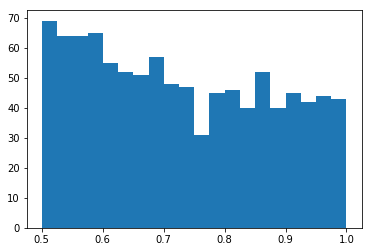

In [75]:
plt.hist(y_results[invalid_galaxies]['galaxy_err'], bins=20)
plt.show()

In [76]:
mean_galaxy_err = np.mean(y_results['galaxy_err'])
std_galaxy_err = np.std(y_results['galaxy_err'])
median_galaxy_err = np.median(y_results['galaxy_err'])

mean_galaxy_err, median_galaxy_err, std_galaxy_err

(0.04082963756521604, 0.0013292431831359863, 0.13070380547173768)

In [79]:
len(y_results[invalid_galaxies])/len(y_results)

0.025241689173839513

In [94]:
def generate_sql_filter():
    # need to remove rows that have invalid 
    bands = ['u', 'g', 'r', 'i', 'z']
    base_fields = ['petroRad', 'petroR50', 'petroR90', 'expRad', 'deVRad',
            'petroMag', 'psfMag', 'expMag', 'dered', 'fiberMag', 'extinction',
            'expAB', 'expPhi', 'deVAB', 'deVPhi', 'fracDeV', 'q', 'u'
        ]

    for band in bands:
        print(f'AND g.{band} != -9999')
        for field in base_fields:
            field_name = f'{field}_{band}'
            print(f'AND g.{field_name} != -9999')

    radii_fields = ['petroRad', 'expRad', 'deVRad']
    for field in radii_fields:
        for band in bands:
            field_name = f'{field}_{band}'
            print(f'AND g.{field_name} > 0.0')

    print('AND pz.z != -9999')
    print('AND pz.zErr != -9999')
    print('AND sp.zErr != -1')

generate_sql_filter()

AND g.u != -9999
AND g.petroRad_u != -9999
AND g.petroR50_u != -9999
AND g.petroR90_u != -9999
AND g.expRad_u != -9999
AND g.deVRad_u != -9999
AND g.petroMag_u != -9999
AND g.psfMag_u != -9999
AND g.expMag_u != -9999
AND g.dered_u != -9999
AND g.fiberMag_u != -9999
AND g.extinction_u != -9999
AND g.expAB_u != -9999
AND g.expPhi_u != -9999
AND g.deVAB_u != -9999
AND g.deVPhi_u != -9999
AND g.fracDeV_u != -9999
AND g.q_u != -9999
AND g.u_u != -9999
AND g.g != -9999
AND g.petroRad_g != -9999
AND g.petroR50_g != -9999
AND g.petroR90_g != -9999
AND g.expRad_g != -9999
AND g.deVRad_g != -9999
AND g.petroMag_g != -9999
AND g.psfMag_g != -9999
AND g.expMag_g != -9999
AND g.dered_g != -9999
AND g.fiberMag_g != -9999
AND g.extinction_g != -9999
AND g.expAB_g != -9999
AND g.expPhi_g != -9999
AND g.deVAB_g != -9999
AND g.deVPhi_g != -9999
AND g.fracDeV_g != -9999
AND g.q_g != -9999
AND g.u_g != -9999
AND g.r != -9999
AND g.petroRad_r != -9999
AND g.petroR50_r != -9999
AND g.petroR90_r != -9999
AND

In [84]:
def classification_scores(y_test, y_pred, title_suffix=''):
    def to_percent(val):
        return np.round(100 * val, 2)
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_pred)
    plot_cm(cm, title_suffix=title_suffix)

    tn, fp, fn, tp = cm.ravel()

    recall = tp/(tp + fn)
    specificity = tn/(tn + fp)
    precision = tp/(tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1 = 2 * precision * recall / (precision + recall)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    results = {
        'recall': to_percent(recall),
        'specificity': to_percent(specificity),
        'precision': to_percent(precision),
        'accuracy': to_percent(accuracy),
        'f1': to_percent(f1),
        'mcc': to_percent(mcc)
    }

    print(results)

In [79]:
def plot_cm(cm, title_suffix=''):
    classes=['Spiral', 'Elliptical']
    norm_cm = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=f'Galaxy Morphology Confusion Matrix {title_suffix}',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f'{norm_cm[i, j]:.2f}%',
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [50]:
def z_err_range(y_results):
    for i in range(16):
        min_range = 0.01 * i
        max_range = 0.01 * (i + 1)
        if (i == 15):
            max_range = 100.0

        selector = np.all([
            y_results.photoz_err_abs >= min_range,
            y_results.photoz_err_abs < max_range
        ], axis=0)
        num_of_records = len(y_results[selector])
        percentage = 100 * num_of_records / len(y_results)
        print(f'Z err between {min_range} and {max_range}: number = {num_of_records}, percentage = {percentage:0.2f}%')

In [29]:
%ls -l data/

total 1714088
-rw-r--r--@ 1 will  staff  349816837 11 Mar 15:14 astromonical_data.csv.gz
-rw-r--r--  1 will  staff    9254347  5 May 12:06 dr15_non_gz_galaxies.csv.gz
-rw-r--r--  1 will  staff   12208320  6 Apr 20:34 frame-g-000756-2-0427.fits
-rw-r--r--  1 will  staff   12208320  6 Apr 20:34 frame-i-000756-2-0427.fits
-rw-r--r--  1 will  staff   12208320  6 Apr 20:34 frame-r-000756-2-0427.fits
-rw-r--r--@ 1 will  staff    6154859  5 May 12:54 gz_nonspec_galaxies.csv.gz
-rw-r--r--@ 1 will  staff  319952110 31 Jan 20:01 input.csv
-rw-r--r--@ 1 will  staff    6070194  5 May 12:07 non_gz_galaxies_dr15.csv.gz
-rw-r--r--@ 1 will  staff    4354305  5 May 12:14 non_gz_galaxies_dr8.csv.gz
-rw-r--r--  1 will  staff    4320000  6 Apr 20:34 obj-1237648720693755918.fits
-rw-r--r--  1 will  staff    4320000  6 Apr 20:34 obj-1237648720693756035.fits
-rw-r--r--  1 will  staff    4320000  6 Apr 20:34 obj-1237648720693756115.fits
-rw-r--r--  1 will  staff    4320000  6 Apr 20:34 obj-1237648720693756163

In [34]:
models = ann2_models

In [35]:
with open('x_scaler.pkl', 'rb') as f:
    import pickle
    
    x_scaler = pickle.load(f)

In [36]:
X_test = pd.read_csv('test_data.csv.bz2',index_col=0)
y_test = pd.read_csv('test_y.csv.bz2',index_col=0)

In [41]:
predictions = init_predictions(models, X_test)
X_test_scale = scale_x(X_test)
for idx, model in enumerate(models):
    prediction = np.array(model.predict(X_test_scale))
    # move indexes around
    prediction = np.transpose(prediction)[0]
    predictions[idx] = prediction

In [123]:
def get_y_results(predictions, y_test):
    predictions_avg = np.mean(predictions, axis=0)
    predictions_err = np.max(np.abs(predictions - predictions_avg), axis=0)
    predictions_std = np.std(predictions, axis=0, ddof=1)
    
    galaxy_classification_preds = predictions.transpose()[0]
    galaxy_classifications = np.count_nonzero(np.round(galaxy_classification_preds, 0), axis=1)
    y_results = y_test.copy().reset_index()
    y_results['galaxy_type_pred_raw'] = predictions_avg[:,0]
    y_results['galaxy_type_pred_err'] = predictions_err[:,0]
    y_results['galaxy_type_pred_std'] = predictions_std[:,0]
    y_results['galaxy_type_pred'] = np.round(y_results.galaxy_type_pred_raw,0)
    y_results['galaxy_type_pred'] = y_results['galaxy_type_pred'].astype(int, copy=False)
    y_results['elliptical_votes'] = galaxy_classifications
    y_results['galaxy_type_pred_votes'] = 0
    y_results.loc[y_results.elliptical_votes >= 3, 'galaxy_type_pred_votes'] = 1
    y_results['correct_votes'] = galaxy_classifications
    y_results.loc[y_results.galaxy_type == 0,'correct_votes'] = 5 - y_results['correct_votes']
    y_results['incorrect_votes'] = 5 - y_results['correct_votes']
    y_results['photoz'] = predictions_avg[:,1]
    y_results['photoz_err'] = (y_results['z'] - y_results['photoz'])/(1 + y_results['z'])
    y_results['photoz_err_abs'] = np.abs(y_results['photoz_err'])
    y_results['photoz_std'] = predictions_std[:,1]
    y_results['galaxy_err'] = np.abs(y_results.galaxy_type - y_results.galaxy_type_pred_raw)

    return y_results, galaxy_classifications

In [98]:
def plot_photo_z_err(y_results, title_suffix=''):
    fig, ax = plt.subplots()

    ax.set(title=f'Histogram of Photo-z Error {title_suffix}',
           ylabel='Number',
           xlabel=r'$\Delta{z} = (z_{photo} - z_{spec})/(1 + z_{spec})$')
    plt.hist(y_results['photoz_err'], histtype='step', log=True, bins=100)
    plt.show()

In [119]:
def z_err_stats(actual, predicted):
    err = (predicted - actual)/(1 + actual)
    abs_err = np.abs(err)
    num_cat_failure = len(err[err > 0.15])
    num_records = len(err)
    
    catastrophic_failure = num_cat_failure / num_records
    
    print(f'Z err stats: mean_abs_err = {abs_err.mean()}, std = {np.std(err, ddof=1)}, min_err = {np.min(abs_err)}, max_err = {np.max(abs_err)}, catastrophic_failure = {catastrophic_failure}')

In [97]:
def plot_specz_vs_photoz(y_results, remove_outliers=False, title_suffix=''):
    if remove_outliers:
        non_outlier = y_results.photoz_err_abs < 0.1
        y_results = y_results[non_outlier]

    fig, ax = plt.subplots(figsize=(15,15))

    lin = np.linspace(np.min(y_results['z']), np.max(y_results['z']), 100)

    ax.set(title=f'Plot of spec-z vs predicted-z {title_suffix}',
           ylabel='predicted-z',
           xlabel='spec-z')
    ax.set_xlim([0, 0.4])
    ax.scatter(y_results['z'], y_results['photoz'], marker='.')
    ax.plot(lin, lin, c= "red")

In [124]:
def plot_galaxy_pred(galaxy_classifications, title_suffix=''):
    fig, ax = plt.subplots()

    ax.set(title=f'Histogram of votes for elliptical galaxy {title_suffix}',
           ylabel='Total',
           xlabel='Votes for elliptical galaxy')
    ax.set_xlim([0,5])
    plt.hist(galaxy_classifications, bins=6, log=True)
    plt.show()

def do_predictions(models, scaler, X_test, y_test, title_suffix=''):
    predictions = init_predictions(models, X_test)
    X_test_scale = scale_x(X_test)
    for idx, model in enumerate(models):
        prediction = np.array(model.predict(X_test_scale))
        # move indexes around
        prediction = np.transpose(prediction)[0]
        predictions[idx] = prediction
        
    y_results, galaxy_classifications = get_y_results(predictions, y_test)
    classification_scores(y_test['galaxy_type'], y_results['galaxy_type_pred'], title_suffix=title_suffix)
    five_vote_selector = np.any([
        y_results['elliptical_votes'] == 0,
        y_results['elliptical_votes'] == 5
    ], axis=0)
    four_vote_selector = np.any([
        y_results['elliptical_votes'] == 1,
        y_results['elliptical_votes'] == 4
    ], axis=0)
    three_vote_selector = np.any([y_results['elliptical_votes'] == 3], axis=0)
    classification_scores(y_test[five_vote_selector]['galaxy_type'],
                          y_results[five_vote_selector]['galaxy_type_pred'],
                          title_suffix=f'5 Votes {title_suffix}')
    print(f'Number of galaxies with 5 votes {len(y_test[five_vote_selector])}')
    print(f'Number of galaxies with 4 votes {len(y_test[four_vote_selector])}')
    print(f'Number of galaxies with 3 votes {len(y_test[three_vote_selector])}')

    for idx in range(0,6):
        vote_selector = y_results['correct_votes'] == idx
        print(f'Number with correct_votes of {idx}: {len(y_results[vote_selector])}')
    
    z_err_range(y_results)
    z_err_stats(y_results['z'], y_results['photoz'])
    plot_galaxy_pred(galaxy_classifications, title_suffix=title_suffix)
    plot_photo_z_err(y_results, title_suffix=title_suffix)
    plot_specz_vs_photoz(y_results, title_suffix=title_suffix)
    plot_specz_vs_photoz(y_results, remove_outliers=True, title_suffix=f'without outliers {title_suffix}')


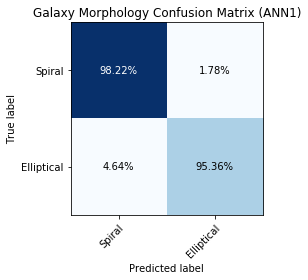

{'recall': 95.36, 'specificity': 98.22, 'precision': 94.97, 'accuracy': 97.48, 'f1': 95.16, 'mcc': 93.46}
Z err between 0.0 and 0.01: number = 24985, percentage = 63.07%
Z err between 0.01 and 0.02: number = 10249, percentage = 25.87%
Z err between 0.02 and 0.03: number = 3073, percentage = 7.76%
Z err between 0.03 and 0.04: number = 925, percentage = 2.33%
Z err between 0.04 and 0.05: number = 263, percentage = 0.66%
Z err between 0.05 and 0.06: number = 73, percentage = 0.18%
Z err between 0.06 and 0.07: number = 27, percentage = 0.07%
Z err between 0.07 and 0.08: number = 7, percentage = 0.02%
Z err between 0.08 and 0.09: number = 6, percentage = 0.02%
Z err between 0.09 and 0.1: number = 1, percentage = 0.00%
Z err between 0.1 and 0.11: number = 1, percentage = 0.00%
Z err between 0.11 and 0.12: number = 2, percentage = 0.01%
Z err between 0.12 and 0.13: number = 1, percentage = 0.00%
Z err between 0.13 and 0.14: number = 1, percentage = 0.00%
Z err between 0.14 and 0.15: number = 

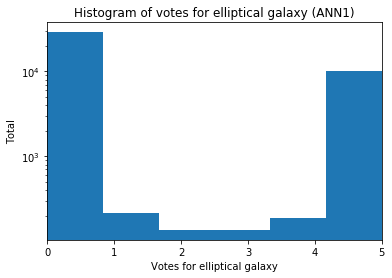

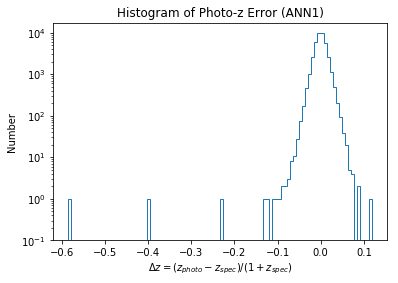

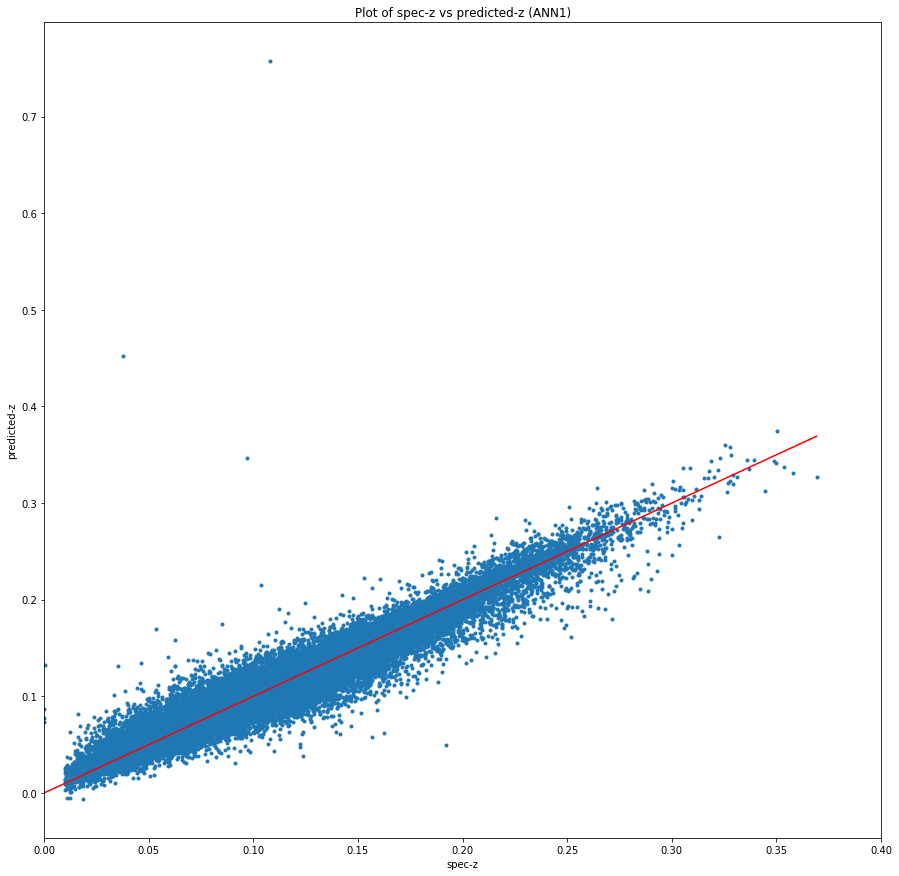

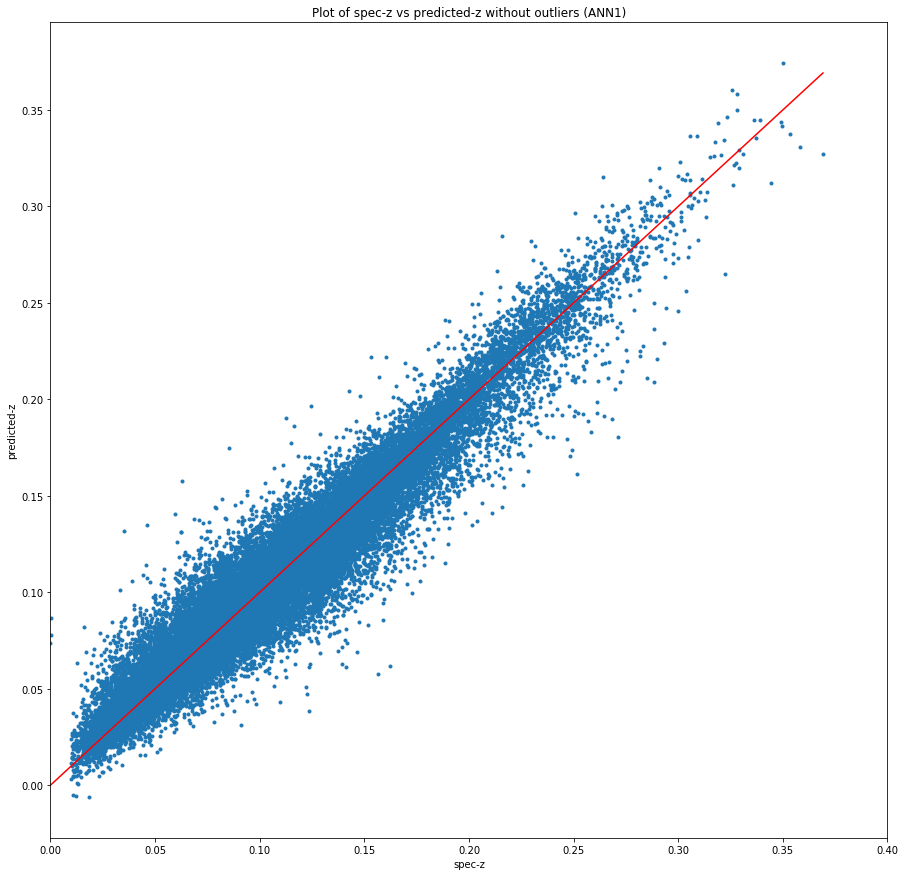

In [103]:
do_predictions(ann2_models, x_scaler, X_test, y_test, title_suffix='(ANN1)')

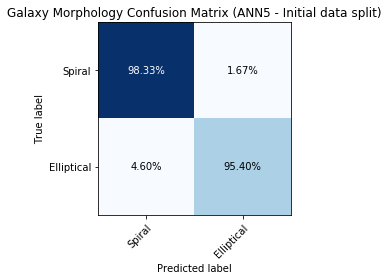

{'recall': 95.4, 'specificity': 98.33, 'precision': 95.28, 'accuracy': 97.57, 'f1': 95.34, 'mcc': 93.69}
Z err between 0.0 and 0.01: number = 25385, percentage = 64.08%
Z err between 0.01 and 0.02: number = 9970, percentage = 25.17%
Z err between 0.02 and 0.03: number = 2989, percentage = 7.54%
Z err between 0.03 and 0.04: number = 895, percentage = 2.26%
Z err between 0.04 and 0.05: number = 248, percentage = 0.63%
Z err between 0.05 and 0.06: number = 79, percentage = 0.20%
Z err between 0.06 and 0.07: number = 30, percentage = 0.08%
Z err between 0.07 and 0.08: number = 7, percentage = 0.02%
Z err between 0.08 and 0.09: number = 6, percentage = 0.02%
Z err between 0.09 and 0.1: number = 2, percentage = 0.01%
Z err between 0.1 and 0.11: number = 2, percentage = 0.01%
Z err between 0.11 and 0.12: number = 1, percentage = 0.00%
Z err between 0.12 and 0.13: number = 1, percentage = 0.00%
Z err between 0.13 and 0.14: number = 2, percentage = 0.01%
Z err between 0.14 and 0.15: number = 0,

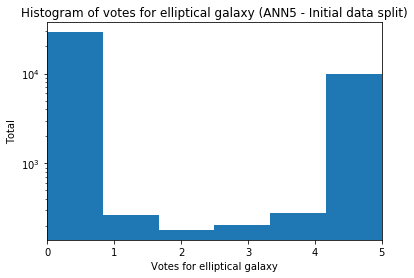

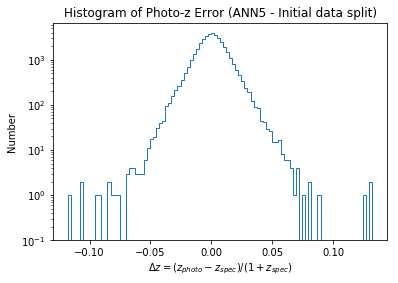

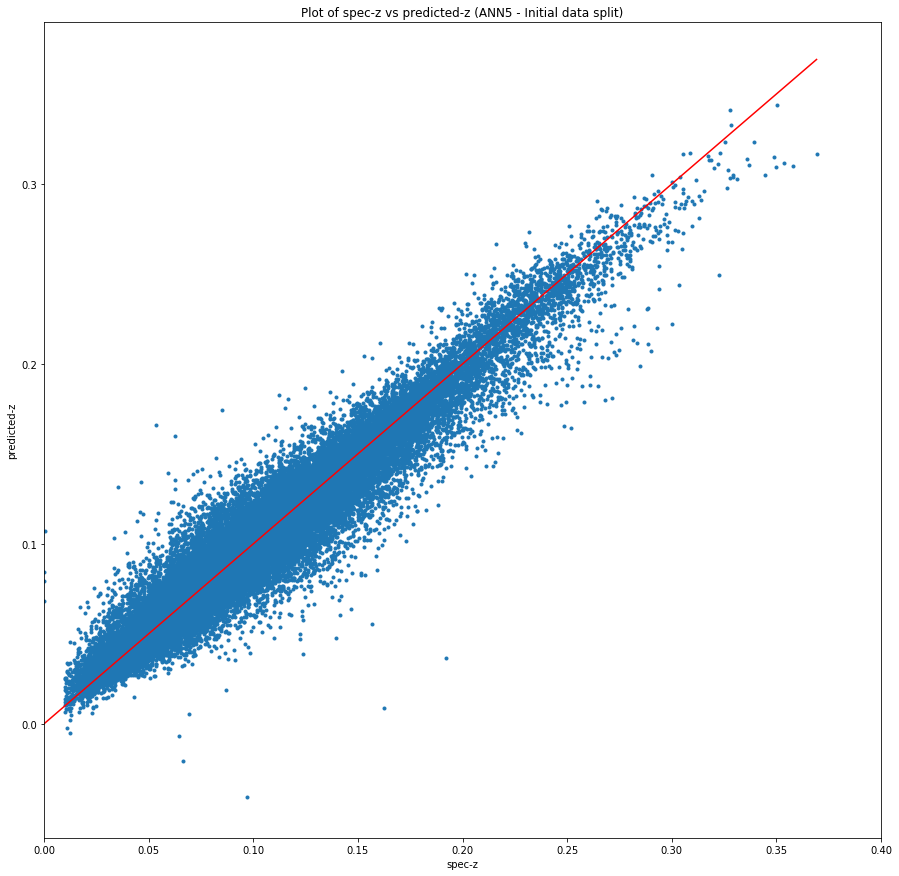

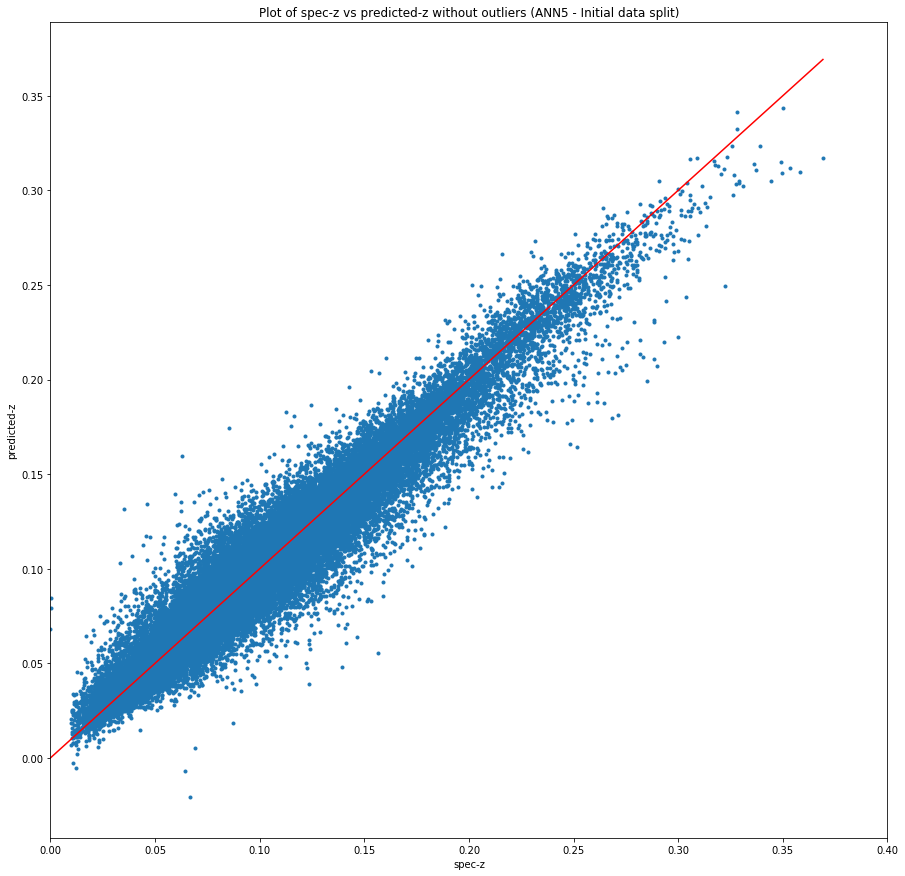

In [100]:
do_predictions(ann5_models, x_scaler, X_test, y_test, title_suffix='(ANN2)')

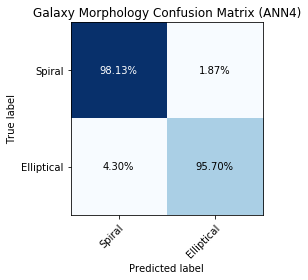

{'recall': 95.7, 'specificity': 98.13, 'precision': 94.77, 'accuracy': 97.49, 'f1': 95.23, 'mcc': 93.53}


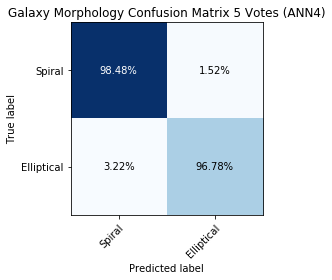

{'recall': 96.78, 'specificity': 98.48, 'precision': 95.69, 'accuracy': 98.04, 'f1': 96.23, 'mcc': 94.91}
Number of galaxies with 5 votes 39079
Number of galaxies with 4 votes 311
Number of galaxies with 3 votes 107
Number with correct_votes of 0: 766
Number with correct_votes of 1: 112
Number with correct_votes of 2: 111
Number with correct_votes of 3: 116
Number with correct_votes of 4: 199
Number with correct_votes of 5: 38313
Z err between 0.0 and 0.01: number = 25503, percentage = 64.37%
Z err between 0.01 and 0.02: number = 9933, percentage = 25.07%
Z err between 0.02 and 0.03: number = 2959, percentage = 7.47%
Z err between 0.03 and 0.04: number = 860, percentage = 2.17%
Z err between 0.04 and 0.05: number = 225, percentage = 0.57%
Z err between 0.05 and 0.06: number = 88, percentage = 0.22%
Z err between 0.06 and 0.07: number = 24, percentage = 0.06%
Z err between 0.07 and 0.08: number = 11, percentage = 0.03%
Z err between 0.08 and 0.09: number = 3, percentage = 0.01%
Z err be

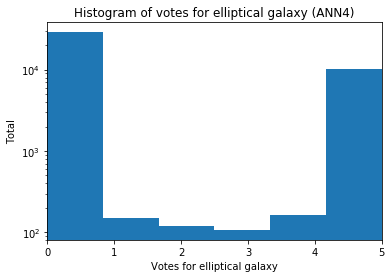

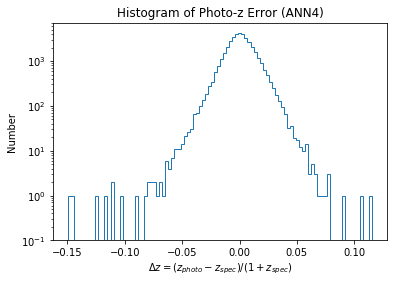

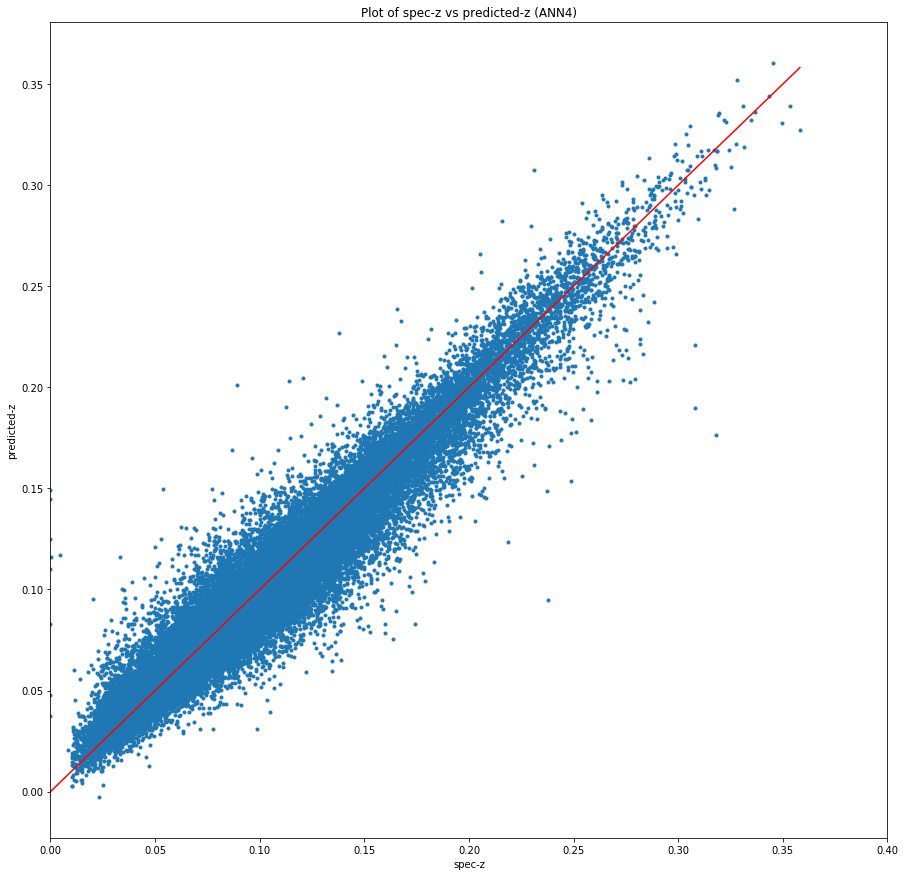

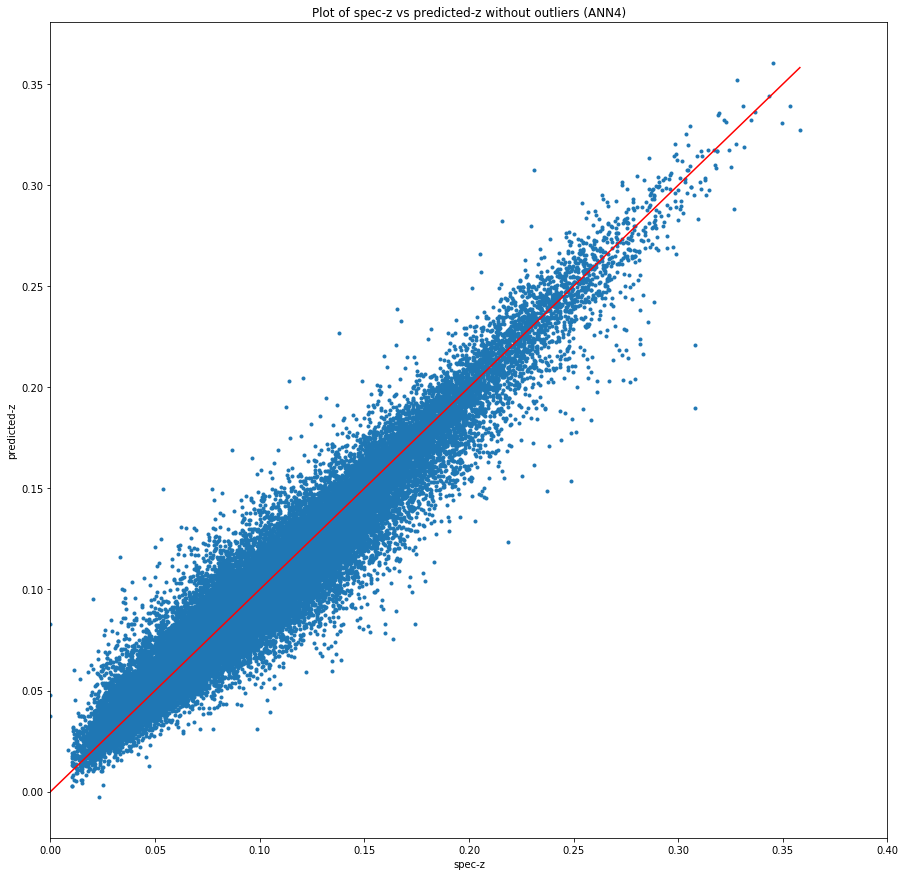

In [125]:
do_predictions(ann_2_layers_512_units_new_split_lower_lr, x_scaler_ns, X_test_ns, y_test_ns, title_suffix='(ANN4)')

In [111]:
len(y_test_ns)

39617

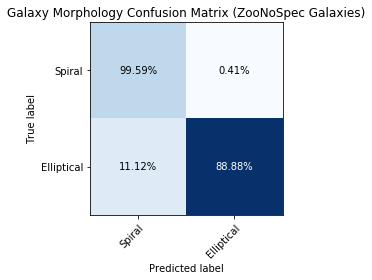

In [128]:
# [[ 485    2]
#  [ 224 1791]]
# {'recall': 0.888833746898263,
#  'specificity': 0.9958932238193019,
#  'precision': 0.9988845510317903,
#  'accuracy': 0.9096722621902478,
#  'f1': 0.9406512605042017,
#  'mcc': 0.7773167215917479}
photoz_cm = np.array(
[[ 485,    2],
 [ 224, 1791]]
)
plot_cm(photoz_cm, title_suffix='(ZooNoSpec Galaxies)')